#### QUESTION 1

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
response = requests.get(url)
#users = pd.read_csv(user, sep="|")
if response.status_code == 200:
    print("Download successful!")
else:
    print("Download failed. Status code:", response.status_code)
    # Handle the error if necessary

Download successful!


In [3]:
users = pd.read_csv(url, delimiter='|')

In [4]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
mean_age = users.groupby('occupation')['age'].mean()
mean_age

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [6]:
# Create a binary column 'male' based on gender 'M' for Male
users['male'] = (users['gender'] == 'M').astype(int)

# Calculate the Male ratio per occupation and sort in descending order
male_ratio = users.groupby('occupation')['male'].mean().sort_values(ascending=False)
male_ratio

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: male, dtype: float64

In [7]:
age_stats = users.groupby('occupation')['age'].agg(['min', 'max'])
age_stats

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [8]:
mean_age = users.groupby(['occupation', 'gender'])['age'].mean()
mean_age

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [9]:
# Calculate the percentage of women and men in each occupation
occupation_gender_count = users.groupby(['occupation', 'gender']).size()
Total = users.groupby('occupation').size()
occupation_gender = (occupation_gender_count / Total * 100).unstack()

# Rename the columns for better interpretation
occupation_gender.rename(columns={'F': 'Female%', 'M': 'Male%'}, inplace=True)
occupation_gender

gender,Female%,Male%
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,NaN,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


#### QUESTION 2

In [10]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
# Use pd.read_csv() directly to download the data and create the DataFrame
euro12 = pd.read_csv(url, delimiter=',')

# The rest of the code is correct
if euro12 is not None:
    print("Download and DataFrame creation successful!")
else:
    print("Download and DataFrame creation failed.")

Download and DataFrame creation successful!


In [11]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [12]:
goal = euro12['Goals']

In [13]:
team = euro12['Team'].nunique()

In [14]:
euro12.shape[1]

35

In [15]:
discipline = euro12[['Team', 'Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [16]:
discipline_sort = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
discipline_sort

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [17]:
hj = discipline.groupby('Team')['Yellow Cards'].mean()
hj

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [18]:
top_6_goals = euro12[euro12['Goals'] >= 6]
top_6_goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [19]:
teams_with_G = euro12[euro12['Team'].str.startswith('G')]
teams_with_G

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [20]:
first_7_columns = euro12.iloc[:, :7]
first_7_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [21]:
last_3_columns = euro12.iloc[:, :-3]
last_3_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [22]:
shooting_accuracy_subset = euro12.query("Team in['England', 'Italy', 'Russia']")[['Team', 'Shooting Accuracy']]
print(shooting_accuracy_subset)


       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


#### QUESTION 3

In [23]:
import numpy as np

In [24]:
# Set a random seed for reproducibility
np.random.seed(42)

# Create the Series with random numbers
series_1 = pd.Series(np.random.randint(1, 5, 100))
series_2 = pd.Series(np.random.randint(1, 4, 100))
series_3 = pd.Series(np.random.randint(10000, 30001, 100))

In [25]:
# Create the DataFrame by joining the Series by column
housing = pd.DataFrame({'bedrs': series_1, 'bathrs': series_2, 'price_sqr_meter': series_3})

In [26]:
# Change the name of the columns
housing.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

In [27]:
# Create a one-column DataFrame with the values of the 3 Series
bigcolumn = pd.concat([series_1, series_2, series_3], axis=0, ignore_index=True)
bigcolumn_df = pd.DataFrame(bigcolumn, columns=['bigcolumn'])

In [28]:
# Check the last index of 'bigcolumn'
print(bigcolumn_df.index[-1])

299


In [29]:
# Reindex the DataFrame to go from 0 to 299
housing = housing.reset_index(drop=True)
bigcolumn_df = bigcolumn_df.reset_index(drop=True)

#### QUESTION 4

In [30]:
filepath = r"C:\Users\MY LAPTOP\Documents\BDAT\BDAT 1004 (Data Programming)\Assignment\Assignment 3\wind.txt"
data = pd.read_csv(filepath, delimiter = '\s+', parse_dates=[[0,1,2]])

data.head(2)

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83


In [31]:
#column change
data.columns = ['Date', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL'] 
data['Date'] = pd.to_datetime(data['Date']) 
data.set_index('Date', inplace=True)

In [32]:
data.head(2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83


In [33]:
#date fix
def date_fix(year):
    if year > 2000:
        return year - 100
    else:
        return year
data.index = data.index.map(lambda x: x.replace(year=date_fix(x.year)))

In [34]:
data.index = pd.to_datetime(data.index, format='%y-%m-%d')

In [35]:
#calculate missing value
missing_values = data.isnull().sum()

In [36]:
#calculate non missing value
non_missing_values = data.notnull().sum().sum()

In [37]:
#calculate mean wind speed
mean_windspeed = data.mean().mean()

In [38]:
#  the min, max, and mean windspeeds and standard deviations of the windspeeds at each location over all the days for loc_stats.
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

In [39]:
#  the min, max, mean, and standard deviations of the windspeeds across all the locations at each day for day_stats
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

In [40]:
# 11. the average windspeed in January for each location.
average_windspeed_january = data[data.index.month == 1].mean()

In [41]:
#  the record to a yearly frequency for each location
data_yearly = data.resample('Y').mean()

In [42]:
# the record to a monthly frequency for each location.
monthly_data = data.resample('M').mean()

In [43]:
# the record to a weekly frequency for each location.
weekly_data = data.resample('W').mean()

In [44]:
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std'])
first_52_weeks_stats = weekly_stats.loc['1961-01-02':'1961-12-31']

In [45]:
weekly_stats = pd.DataFrame()
weekly_stats['min'] = data['1961-01-02':'1961-12-31'].resample('W').min().min(axis=1)
weekly_stats['max'] = data['1961-01-02':'1961-12-31'].resample('W').max().max(axis=1)
weekly_stats['mean'] = data['1961-01-02':'1961-12-31'].resample('W').mean().mean(axis=1)
weekly_stats['std'] = data['1961-01-02':'1961-12-31'].resample('W').std().std(axis=1)

#### QUESTION 5

In [46]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
# Use pd.read_csv() directly to download the data and create the DataFrame
chipo = pd.read_csv(url, delimiter='\t')

# The rest of the code is correct
if chipo is not None:
    print("Download and DataFrame creation successful!")
else:
    print("Download and DataFrame creation failed.")

Download and DataFrame creation successful!


In [47]:
#first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [48]:
# number of observations
chipo.shape[0]

4622

In [49]:
# number of columns
chipo.shape[1]

5

In [50]:
# names of all columns
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [51]:
# dataset index
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [52]:
# the most ordered item
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).index[0]
most_ordered_item

'Chicken Bowl'

In [53]:
# how many time the most ordered item was ordered
most_ordered_item_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
most_ordered_item_quantity

761

In [54]:
# the most ordered choice
most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending=False).index[0]
most_ordered_choice

'[Diet Coke]'

In [55]:
# total of all items ordered
total_ordered_items = chipo['quantity'].sum()
total_ordered_items

4972

In [56]:
# changing price item to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [57]:
# confirming the datatype of price item column
chipo['item_price'].dtype

dtype('float64')

In [58]:
# total revenue for the period
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo['revenue'].sum()

39237.02

In [59]:
# number of orders made
order_number = chipo['order_id'].nunique()
order_number

1834

In [61]:
# average revenue amount per order
chipo.groupby('order_id')['revenue'].sum().mean()

21.39423118865867

In [62]:
# number of items sold
different_items_sold = chipo['item_name'].nunique()
different_items_sold

50

#### QUESTION 6

In [63]:
marriage = pd.read_csv(r"C:\Users\MY LAPTOP\Documents\BDAT\BDAT 1004 (Data Programming)\Assignment\Assignment 3\us-marriages-divorces-1867-2014.csv")
marriage.head(2)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3


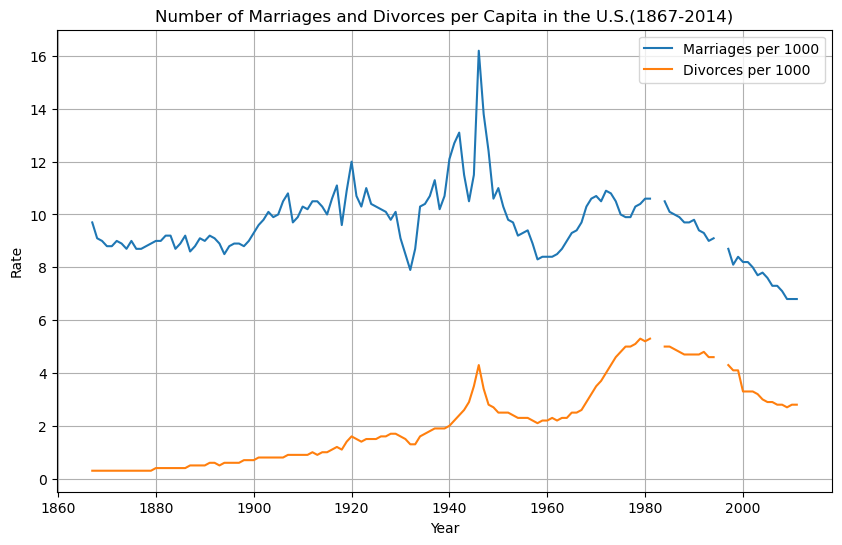

In [64]:
# line plot of marriages and divorces between 1867-2014
plt.figure(figsize=(10, 6))
plt.plot(marriage['Year'], marriage['Marriages_per_1000'], label='Marriages per 1000')
plt.plot(marriage['Year'], marriage['Divorces_per_1000'], label='Divorces per 1000')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Number of Marriages and Divorces per Capita in the U.S.(1867-2014)')
plt.legend()
plt.grid(True)
plt.show()

#### QUESTION 7

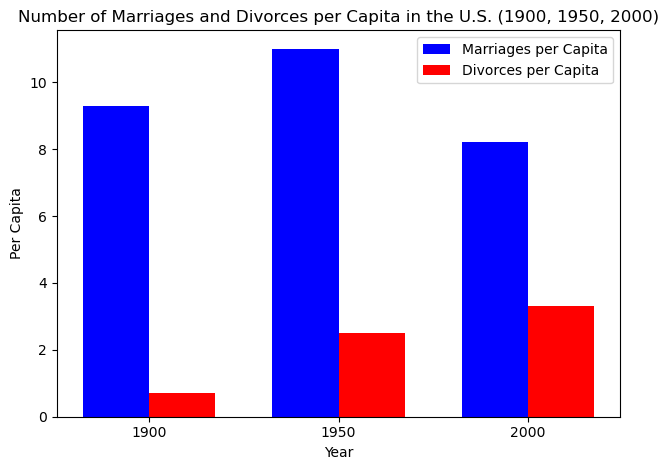

In [65]:
years = [1900, 1950, 2000]

# Filter data for the given years
marriages_data = [marriage.loc[marriage['Year'] == year, 'Marriages_per_1000'].iloc[0] for year in years]
divorces_data = [marriage.loc[marriage['Year'] == year, 'Divorces_per_1000'].iloc[0] for year in years]

# Create the vertical bar chart
width = 0.35
x = range(len(years))
fig, ax = plt.subplots()
rects1 = ax.bar(x, marriages_data, width, label='Marriages per Capita', color='blue')
rects2 = ax.bar([i + width for i in x], divorces_data, width, label='Divorces per Capita', color='red')

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita')
ax.set_title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(years)
ax.legend()

plt.tight_layout()
plt.show()


#### QUESTION 8

In [66]:
actor = pd.read_csv(r"C:\Users\MY LAPTOP\Documents\BDAT\BDAT 1004 (Data Programming)\Assignment\Assignment 3\actor_kill_counts.csv")
actor.head(2)

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295


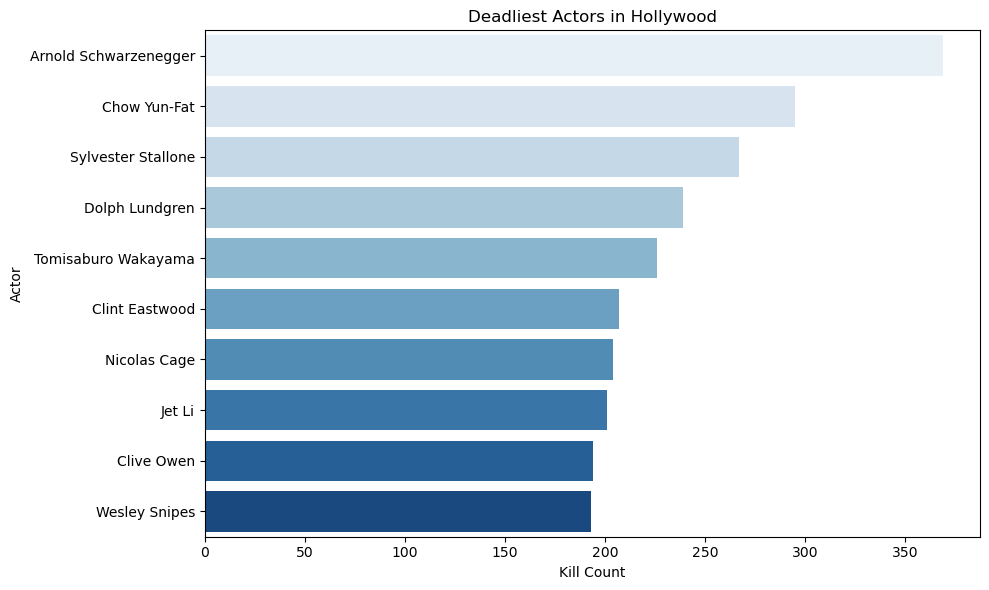

In [67]:
# Sort the DataFrame by 'Count'
actors = actor.sort_values(by='Count', ascending=False)

# Create the vertical bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Actor', data=actors, palette='Blues')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.tight_layout()
plt.show()


#### QUESTION 9

In [68]:
roman = pd.read_csv(r"C:\Users\MY LAPTOP\Documents\BDAT\BDAT 1004 (Data Programming)\Assignment\Assignment 3\roman-emperor-reigns.csv")
roman.head(2)

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated


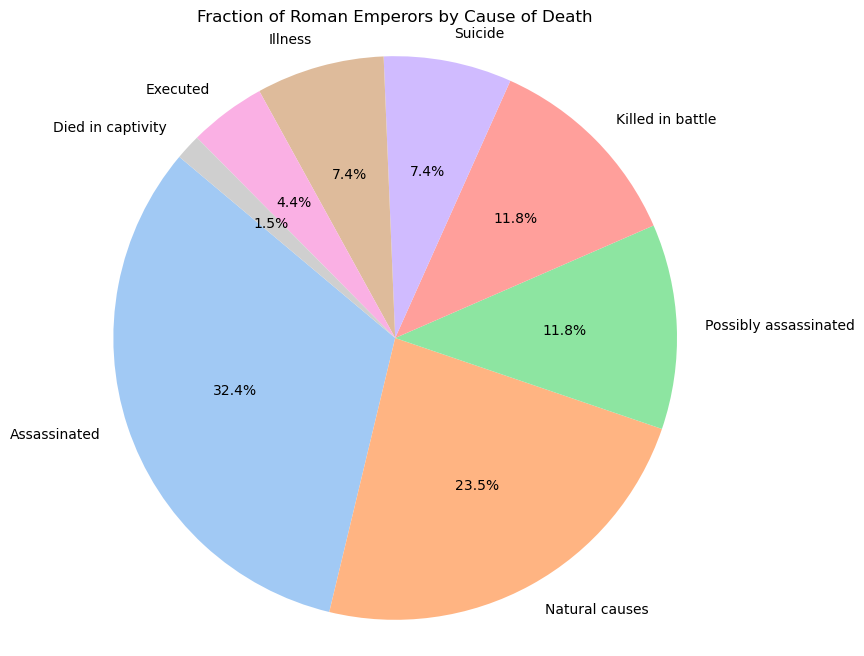

In [69]:
# Count the occurrences of each cause of death
cause_of_death_counts = roman['Cause_of_Death'].value_counts()

# Create the pie chart using Seaborn
plt.figure(figsize=(8, 8))
sns.set_palette('pastel')
plt.pie(cause_of_death_counts, labels=cause_of_death_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fraction of Roman Emperors by Cause of Death')
plt.axis('equal')
plt.show()


#### QUESTION 10

In [70]:
arc = pd.read_csv(r"C:\Users\MY LAPTOP\Documents\BDAT\BDAT 1004 (Data Programming)\Assignment\Assignment 3\arcade-revenue-vs-cs-doctorates.csv")
arc.head(2)

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830


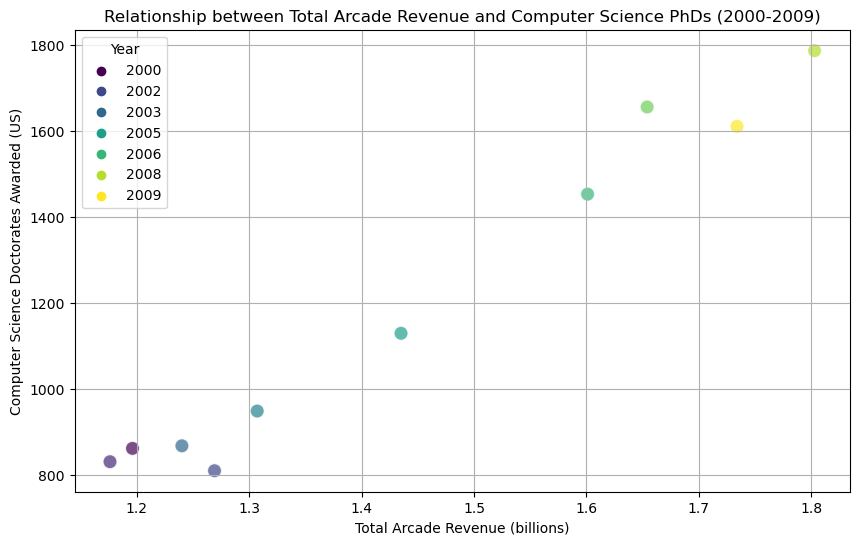

In [71]:
# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)',
                hue='Year', data=arc, palette='viridis', s=100, alpha=0.7)
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Total Arcade Revenue and Computer Science PhDs (2000-2009)')
plt.grid(True)
plt.legend(title='Year')
plt.show()